In [60]:
import sys
import os
import glob 

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

import collections



## load data
some preprocessing

In [5]:
data_dir = "/cluster/home/taoj/work_dir/eth-capstone/tree-water-deficit/data/tstoy04"

In [6]:
twd_tree_series = pd.read_csv(os.path.join(data_dir, "tstoy04_series.csv"), sep = ",")
twd_tree_sites = pd.read_csv(os.path.join(data_dir, "tstoy04_sites.csv"), sep = ",")


In [7]:
series_file_path = glob.glob(os.path.join(data_dir, "SeparateSeries/tstoy04_*.csv"))
series_name = [os.path.basename(series).replace(".csv", "").replace("tstoy04_", "")for series in series_file_path]
series_file_dfs = {series_name[i]: pd.read_csv(series_file_path[i], sep=",") for i in range(len(series_file_path))}

In [8]:
twd_tree_series["series_no"] = twd_tree_series.index+ 1
twd_tree_series_sites = twd_tree_series.merge(twd_tree_sites, left_on="site", 
                                              right_on = "site_name", how="left")
twd_tree_series_sites["species_site"] = twd_tree_series_sites["species"] + "_" + twd_tree_series_sites["site_name"]

In [9]:
twd_tree_series_sites.head()

,series,species,site,series_no,site_name,site_longitude,site_latitude,site_easting,site_northing,mch_ind_closest,mch_easting,mch_northing,mch_elevation,mch_site_eucldist,species_site
0,19,Fagus sylvatica,Bachtel-Forest,1,Bachtel-Forest,8.89016,47.29413,2.709787e+06,1.239153e+06,46975,2.710088e+06,1.239223e+06,882.140575,308.935980,Fagus sylvatica_Bachtel-Forest
1,120,Quercus petraea,Bueren-Forest,2,Bueren-Forest,7.67722,47.46111,2.617991e+06,1.256731e+06,28625,2.618033e+06,1.256244e+06,537.765575,488.442974,Quercus petraea_Bueren-Forest
2,121,Quercus petraea,Bueren-Forest,3,Bueren-Forest,7.67722,47.46111,2.617991e+06,1.256731e+06,28625,2.618033e+06,1.256244e+06,537.765575,488.442974,Quercus petraea_Bueren-Forest
3,136,Carpinus betulus,Bursins-Forest,4,Bursins-Forest,6.28370,46.45552,2.511271e+06,1.145564e+06,6353,2.511187e+06,1.145981e+06,643.515575,425.379683,Carpinus betulus_Bursins-Forest
4,137,Carpinus betulus,Bursins-Forest,5,Bursins-Forest,6.28370,46.45552,2.511271e+06,1.145564e+06,6353,2.511187e+06,1.145981e+06,643.515575,425.379683,Carpinus betulus_Bursins-Forest


In [10]:
series_file_dfs =collections.OrderedDict(sorted(series_file_dfs.items()))
series_file_dfs_all_info = []
for i, df in enumerate(series_file_dfs.values()):
    df['series'] = series_name[i]
    df['site_name'] = twd_tree_series_sites.loc[twd_tree_series_sites['series_no'] == i+1, 'site_name'].values[0]
    df['species'] = twd_tree_series_sites.loc[twd_tree_series_sites['series_no'] == i+1, 'species'].values[0]
    df["series_no"] = i+1
    series_file_dfs_all_info.append(df)

df_series_all = pd.concat(series_file_dfs_all_info, ignore_index=True )

In [11]:
# split year month and store them in separate columns
df_series_all["year"] = df_series_all["ts"].apply(lambda x: int(x.split("-")[0]))
df_series_all["month"] = df_series_all["ts"].apply(lambda x: int(x.split("-")[1]))
df_series_all["year_month"] = df_series_all["year"].astype(str) + "-" + df_series_all["month"].astype(str).str.zfill(2)


In [12]:
df_series_all.head()

,ts,twd,pr,at,ws,dp,sr,lr,series,site_name,species,series_no,year,month,year_month
0,2020-01-01,0.000000,-4.967054e-09,0.684757,1.197186,-3.640214,62.291590,212.325577,series_06,Bachtel-Forest,Fagus sylvatica,1,2020,1,2020-01
1,2020-01-02,0.121408,-1.092752e-07,0.213088,1.312338,-4.036302,60.923900,219.828021,series_06,Bachtel-Forest,Fagus sylvatica,1,2020,1,2020-01
2,2020-01-03,0.118271,1.285767e-01,2.009851,2.115951,-0.953911,55.859708,275.925156,series_06,Bachtel-Forest,Fagus sylvatica,1,2020,1,2020-01
3,2020-01-04,0.000000,9.927122e-02,1.573278,3.247398,0.721803,13.914832,311.878969,series_06,Bachtel-Forest,Fagus sylvatica,1,2020,1,2020-01
4,2020-01-05,0.000000,-1.986821e-08,-0.442240,2.159941,-4.094125,62.620516,216.038632,series_06,Bachtel-Forest,Fagus sylvatica,1,2020,1,2020-01


* ts = daily time stamp, from 2020-01-01 till 2022-12-31
* twd = target TWD_norm variable, unprocessed
* pr = precipitation in kg/m^2
* at = air temperature in °C
* ws = wind speed in m/S
* dp = dew point in °C
* sr = net short wave radiation flux in W/m^2
* lr = net long wave radiation flux in W/m^2

## plot site maps

In [13]:
twd_tree_series

,series,species,site,series_no
0,19,Fagus sylvatica,Bachtel-Forest,1
1,120,Quercus petraea,Bueren-Forest,2
2,121,Quercus petraea,Bueren-Forest,3
3,136,Carpinus betulus,Bursins-Forest,4
4,137,Carpinus betulus,Bursins-Forest,5
5,138,Carpinus betulus,Bursins-Forest,6
6,139,Carpinus betulus,Bursins-Forest,7
7,193,Corylus avellana,Choeliacher-Orchard,8
8,194,Corylus avellana,Choeliacher-Orchard,9
9,288,Picea abies,Davos-Seehornwald,10


In [14]:
twd_tree_series_sites.head()

,series,species,site,series_no,site_name,site_longitude,site_latitude,site_easting,site_northing,mch_ind_closest,mch_easting,mch_northing,mch_elevation,mch_site_eucldist,species_site
0,19,Fagus sylvatica,Bachtel-Forest,1,Bachtel-Forest,8.89016,47.29413,2.709787e+06,1.239153e+06,46975,2.710088e+06,1.239223e+06,882.140575,308.935980,Fagus sylvatica_Bachtel-Forest
1,120,Quercus petraea,Bueren-Forest,2,Bueren-Forest,7.67722,47.46111,2.617991e+06,1.256731e+06,28625,2.618033e+06,1.256244e+06,537.765575,488.442974,Quercus petraea_Bueren-Forest
2,121,Quercus petraea,Bueren-Forest,3,Bueren-Forest,7.67722,47.46111,2.617991e+06,1.256731e+06,28625,2.618033e+06,1.256244e+06,537.765575,488.442974,Quercus petraea_Bueren-Forest
3,136,Carpinus betulus,Bursins-Forest,4,Bursins-Forest,6.28370,46.45552,2.511271e+06,1.145564e+06,6353,2.511187e+06,1.145981e+06,643.515575,425.379683,Carpinus betulus_Bursins-Forest
4,137,Carpinus betulus,Bursins-Forest,5,Bursins-Forest,6.28370,46.45552,2.511271e+06,1.145564e+06,6353,2.511187e+06,1.145981e+06,643.515575,425.379683,Carpinus betulus_Bursins-Forest


In [15]:
fig = px.scatter_geo(twd_tree_series_sites, 
                     lat=twd_tree_series_sites.site_latitude,
                     lon=twd_tree_series_sites.site_longitude,
                     scope='europe',  # Keep Europe as scope for context
                     projection='natural earth',
                    #  hover_name=["site_name", 'species'],
                     hover_data={'species':True,'site_name':True, 'mch_elevation' : True},
                     color="mch_elevation",  # Color by species
                     symbol= "species",
                     center=dict(lat=46.8182, lon=8.2275),  # Switzerland's center coordinates
                     fitbounds="locations",  # Automatically fit bounds to data points

                    )

# Update layout to zoom in on Switzerland
fig.update_geos(
    lataxis_range=[45.8, 47.8],  # Approximate latitude range of Switzerland
    lonaxis_range=[6.0, 10.5],   # Approximate longitude range of Switzerland
    showcountries=True,          # Show country borders
    countrycolor="Black"
)

# Update layout to show two separate legends
fig.update_layout(
    legend_title_text='Species',
    showlegend=True,
    legend=dict(
        title=dict(text='Species'),
        yanchor="top",
        y=1.65,
        xanchor="left",
        x=0.4,
        
    ),
    legend2=dict(
        title=dict(text=''),
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=1.02
    )
)

# Update traces to create separate legends
# for trace in fig.data:
#     if 'symbol' in trace.name:
#         trace.update(showlegend=True, legendgroup="sites", legendgrouptitle_text="Sites")
#     else:
#         trace.update(showlegend=True, legendgroup="species", legendgrouptitle_text="Species")
        
fig.show()

## plot TWD of a series over time

In [16]:
series_example = series_file_dfs['series_01']
series_example.head()

,ts,twd,pr,at,ws,dp,sr,lr,series,site_name,species,series_no
0,2020-01-01,0.000000,-4.967054e-09,0.684757,1.197186,-3.640214,62.291590,212.325577,series_06,Bachtel-Forest,Fagus sylvatica,1
1,2020-01-02,0.121408,-1.092752e-07,0.213088,1.312338,-4.036302,60.923900,219.828021,series_06,Bachtel-Forest,Fagus sylvatica,1
2,2020-01-03,0.118271,1.285767e-01,2.009851,2.115951,-0.953911,55.859708,275.925156,series_06,Bachtel-Forest,Fagus sylvatica,1
3,2020-01-04,0.000000,9.927122e-02,1.573278,3.247398,0.721803,13.914832,311.878969,series_06,Bachtel-Forest,Fagus sylvatica,1
4,2020-01-05,0.000000,-1.986821e-08,-0.442240,2.159941,-4.094125,62.620516,216.038632,series_06,Bachtel-Forest,Fagus sylvatica,1


why precipitation can be minus?

In [17]:
# for i in range(0, 41):

fig = px.line(series_example, x='ts', y="twd", )
# fig = px.line(series_example, x='ts', y=log["pr"])
fig.show()

In [18]:

twd_tree_series_sites.species_site.value_counts()

species_site
Picea abies_Schmitten-Forest                7
Carpinus betulus_Bursins-Forest             4
Picea abies_Davos-Seehornwald               3
Pinus sylvestris_Pfynwald-Irrigation        3
Fagus sylvatica_Genolier-Forest             3
Picea abies_Pfynwald-Illgraben-Northwest    2
Quercus petraea_Bueren-Forest               2
Corylus avellana_Choeliacher-Orchard        2
Quercus petraea_Neunkirch-Southeast         2
Fagus sylvatica_Neunkirch-North             2
Picea abies_Hohtenn-Gampel-Forest           2
Pseudotsuga menziesii_Muri-Forest           2
Fagus sylvatica_Bachtel-Forest              1
Picea abies_Laegeren-Hut                    1
Pinus sylvestris_Lens-Forest                1
Pinus sylvestris_Pfynwald-Control           1
Fagus sylvatica_Neunkirch-Southwest         1
Fagus sylvatica_Saillon-A860                1
Fagus sylvatica_Schaenis-low                1
Fagus sylvatica_Sihlwald-Forest             1
Name: count, dtype: int64

In [19]:
len(twd_tree_series_sites.site.unique())
len(twd_tree_series_sites.species.unique())

7

In [20]:
fig = px.line(df_series_all, x='ts', y="twd", color = "series", facet_row="site_name",
            facet_col = "year",
            #   symbol="species",
            #  
            facet_row_spacing = 0.01,
                line_group = "species" )

fig.update_traces(marker=dict(size=3))
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1])) 
fig.update_layout(
    height=4000,
    width=800,
)

fig.update_xaxes(matches=None)
fig.update_yaxes(matches=None)

fig.show()


- Understand correlation? 
- compute PCA?
- read some paper about how to split the data? 
- auto-correlation?
- compute statistics? 
- how to use other variables? 

### calculate autocorrelation
- try for 2020

In [22]:
# Importing statsmodel dependencies

import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import acf
from statsmodels.regression.linear_model import OLS
from statsmodels.graphics.tsaplots import plot_acf


In [23]:
df_series_all.loc[(df_series_all.series_no== 1) & (df_series_all.year == 2020), "twd"].autocorr(lag=3)

np.float64(0.6487688681585871)

In [90]:
n_lag = 50
acf_arrays= np.zeros(shape = (3, 42, n_lag+1))

for year_idx in range(0,3):
    for series_no in range(1,43):
        acf_arrays[year_idx, series_no-1, :] = acf(df_series_all.loc[(df_series_all.series_no== series_no) & (df_series_all.year == 2020+year_idx), "twd"], fft=False, nlags=n_lag)



df_auto_corr = pd.DataFrame(acf_arrays[0,:,:])
df_auto_corr['series_no'] = np.arange(1,43)
df_auto_corr_melt = df_auto_corr.melt(id_vars=['series_no'], var_name='lag', value_name='acf')
df_auto_corr_melt = df_auto_corr_melt.merge(twd_tree_series_sites[['series_no', 'site_name', 'species']], on='series_no', how='left')

In [91]:
mean_acf = pd.DataFrame(df_auto_corr_melt.groupby(['lag', 'site_name', "species"]).acf.mean()).reset_index()
mean_std = pd.DataFrame(df_auto_corr_melt.groupby(['lag', 'site_name', "species"]).acf.std()).reset_index()

mean_acf['std'] = mean_std['acf']
mean_acf = mean_acf.loc[mean_acf.acf!=0,]

In [92]:
mean_acf.loc[(mean_acf["species"] == "Fagus sylvatica") & (mean_acf["site_name"] == "Sihlwald-Forest") , ]
twd_tree_series_sites.loc[(twd_tree_series_sites["species"] == "Fagus sylvatica") & (twd_tree_series_sites["site_name"] == "Sihlwald-Forest") , ]

,series,species,site,series_no,site_name,site_longitude,site_latitude,site_easting,site_northing,mch_ind_closest,mch_easting,mch_northing,mch_elevation,mch_site_eucldist,species_site
41,1232,Fagus sylvatica,Sihlwald-Forest,42,Sihlwald-Forest,8.56111,47.25056,2.684971e+06,1.233901e+06,41819,2.684597e+06,1.233941e+06,722.265575,375.727303,Fagus sylvatica_Sihlwald-Forest


In [93]:
acf_arrays[2].mean(axis=0)

array([ 1.        ,  0.90847193,  0.80223451,  0.73220957,  0.68248435,
        0.63951693,  0.60014515,  0.56619588,  0.5381586 ,  0.51961556,
        0.50478401,  0.48560443,  0.46646387,  0.45060251,  0.43279265,
        0.4116492 ,  0.39015329,  0.36137946,  0.33966125,  0.33227707,
        0.32786008,  0.31702834,  0.30039694,  0.28364589,  0.26544666,
        0.2505225 ,  0.23755225,  0.22398713,  0.21111653,  0.18784038,
        0.1604333 ,  0.13587869,  0.11666431,  0.10098978,  0.08757571,
        0.07686682,  0.06480029,  0.05763106,  0.04943192,  0.04044096,
        0.0270572 ,  0.01616673,  0.00539739, -0.00470235, -0.0137422 ,
       -0.02764687, -0.04298822, -0.05773177, -0.07018686, -0.07749742,
       -0.08135897])

In [99]:
# acf_arrays.mean(axis =0)
# acf_arrays.std(axis =0)


# fig2 = px.line(y = acf_arrays[0].mean(axis =0), x= np.arange(n_lag+1),
# error_y = acf_arrays[0].std(axis =0), labels = "2020 mean")
fig2 = go.Figure()
fig2.add_trace(
    go.Scatter(
        x=np.arange(n_lag+1),
        y=acf_arrays[0].mean(axis=0),
        error_y=dict(array=acf_arrays[0].std(axis=0)),
        name='2020 Mean',
        line=dict(color='blue', width=2),
        showlegend=True
    )
)


# Add second line plot as a trace
fig2.add_trace(
    go.Scatter(
        x=np.arange(n_lag+1),
        y=acf_arrays[1].mean(axis=0),
        error_y=dict(array=acf_arrays[1].std(axis=0)),
        name='2021 Mean',
        line=dict(color='black', width=2),
        showlegend=True
    )
)

# Add third line plot as a trace
fig2.add_trace(
    go.Scatter(
        x=np.arange(n_lag+1),
        y=acf_arrays[2].mean(axis=0),
        error_y=dict(array=acf_arrays[2].std(axis=0)),
        name='2022 Mean',
        line=dict(color='red', width=2),
        showlegend=True
    )
)

fig2.show()





In [95]:
# Create first figure
fig = px.line(mean_acf, x="lag", y="acf",
              color="species", symbol="site_name",
              error_y="std", facet_row="species",
              )

# Add second line plot as a trace
fig.add_trace(
    go.Scatter(
        x=np.arange(n_lag+1),
        y=acf_arrays.mean(axis=0),
        error_y=dict(array=acf_arrays.std(axis=0)),
        name='Overall Mean',
        line=dict(color='black', width=2),
        showlegend=True
    )
)

fig.update_traces(opacity=.4)

# Update layout if needed
fig.update_layout(
    title='Autocorrelation Function by Species and Site',
    xaxis_title='Lag',
    yaxis_title='ACF',
    height = 2000, 
    width = 800,
    
)

fig.show()

n = 5 is good value for autocorrelation

#### compute correlation of the features with twd

In [111]:
corr = df_series_all[["twd", "pr", "at", "ws", "dp", "sr", "lr"]].corr()

In [114]:
corr

,twd,pr,at,ws,dp,sr,lr
twd,1.000000,-0.131263,-0.119471,-0.124832,-0.220373,0.008947,-0.198776
pr,-0.131263,1.000000,0.002591,0.089978,0.167164,-0.276992,0.344977
at,-0.119471,0.002591,1.000000,0.080830,0.905848,0.614794,0.764140
ws,-0.124832,0.089978,0.080830,1.000000,0.027928,0.046114,0.080146
dp,-0.220373,0.167164,0.905848,0.027928,1.000000,0.388226,0.883125
sr,0.008947,-0.276992,0.614794,0.046114,0.388226,1.000000,0.160829
lr,-0.198776,0.344977,0.764140,0.080146,0.883125,0.160829,1.000000


<Axes: >

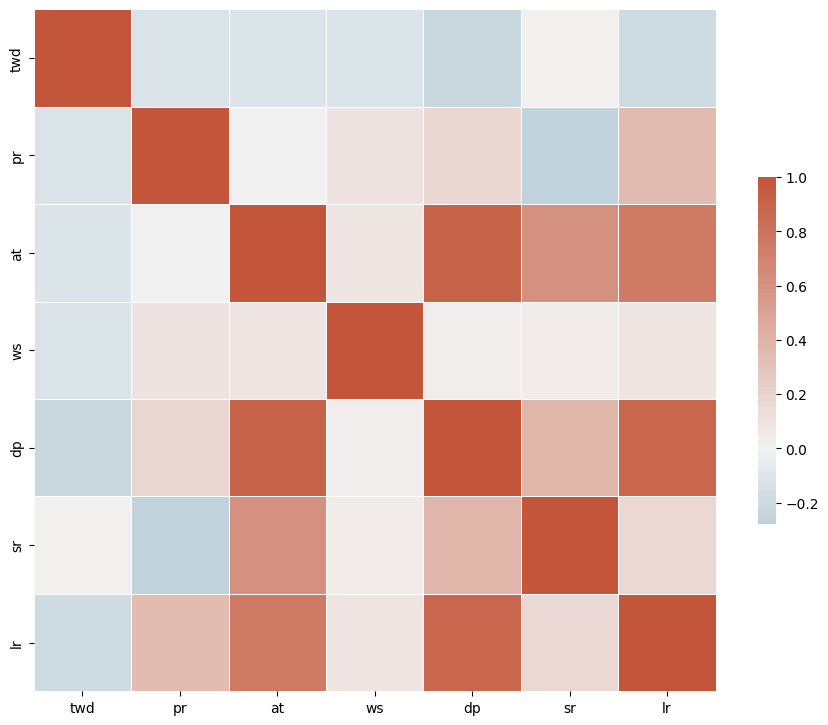

In [117]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap= cmap, vmax= 1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})